In [1667]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from tqdm import tqdm

__Задача 3__

__(a)__

Асимптотический доверительный интервал

In [340]:
np.random.seed(7645)
sample_exp_3 = np.random.exponential(scale = 1, size = (10000,20))

In [341]:
sample_exp_3.mean()

1.0000577124221173

In [1000]:
n = 20
means = sample_exp_3.mean(axis = 1)
z = stats.norm.isf(0.025)

In [1002]:
z

1.9599639845400545

асимптотический интервал для __математического ожидания__

$$
\bar X - z_{0.975}\cdot \sqrt{\frac{\hat\sigma^2}{n}}< \mu<\bar X - z_{0.975}\cdot \sqrt{\frac{\hat\sigma^2}{n}}
$$

In [1003]:
expectation_ci = np.array([means - z * np.sqrt(sample_exp_3.var(ddof = 1, axis = 1)/n), means + z * np.sqrt(sample_exp_3.var(ddof = 1, axis = 1)/n)]).T

In [1004]:
count_in = 0
for i,j in expectation_ci:
    if i < 1 and 1 < j:
        count_in +=1

In [1005]:
count_in/10000

0.9008

Получили оценку, что интервал накрывает действительное мо с вероятностью 0.9

__Наивный бутстрап__

для каждой из 10000 выборок с экспоненциальным распределением генерирую 10000 бутстрап выборок среднего, затем строю по ним 95-% интервал с помощью квантилей

$$
q_{left}(\frac{1}{\lambda}_{boot}) < \frac{1}{\lambda}< q_{right}(\frac{1}{\lambda}_{boot})
$$

In [1662]:
np.random.seed(2)
ci_covers = 0
for i in tqdm(range(10000)):
    X = sample_exp_3[i]
    bootstrapped_X = np.random.choice(X, size = (10000,20))
    R_hat = bootstrapped_X.mean(axis = 1)
    q_right = np.percentile(R_hat, 97.5)
    q_left = np.percentile(R_hat, 2.5)
    ci = [q_left, q_right]
    if ci[0] < 1 < ci[1]:
        ci_covers += 1

100%|██████████| 10000/10000 [00:44<00:00, 222.81it/s]


In [1009]:
ci_covers / 10000

0.9018

Получил оценкк вероятноcти накрытия интервалом действительного параметра равную 0.902

__Бутстрэп t-статистики__

Тут для каждой изначальной выборки генерирую 10000 бутстрап выборок, затем считаю следующую статистику:

$$
\frac{\bar X^* - \bar X}{\sqrt\frac{\hat\sigma_*^2}{n}}
$$

По распределнию полученных статистик высчитываю квантили $q_{left}$ и $q_{right}$ и строю 95-% интервал

$$
\bar X - q_{right}\cdot\sqrt{\frac{\hat\sigma^2}{n}} < \frac{1}{\lambda} <\bar X - q_{left}\cdot\sqrt{\frac{\hat\sigma^2}{n}}
$$

In [1010]:
n = 20

In [1011]:
np.random.seed(9)
ci_covers = 0
for i in tqdm(range(10000)):
    X = sample_exp_3[i]
    bootstrapped_X = np.random.choice(X, size = (10000, 20))
    R_hat = (bootstrapped_X.mean(axis = 1) - X.mean())/(np.sqrt(bootstrapped_X.var(ddof = 1, axis = 1)/n))
    q_right = np.percentile(R_hat, 97.5)
    q_left = np.percentile(R_hat, 2.5)
    ci = [X.mean() - q_right * np.sqrt(X.var(ddof = 1)/n), X.mean()- q_left * np.sqrt(X.var(ddof = 1)/n)]
    if ci[0] < 1 < ci[1]:
        ci_covers += 1

100%|██████████| 10000/10000 [01:00<00:00, 165.38it/s]


Получил оценку вероятности накрытия интервалом действительного мо равную

In [1013]:
ci_covers/10000 #ура норм

0.9459

__(б)__

Теперь для стьюдента с 3 степенями свободы. Действия абсолютно аналогичные пункту (а)

In [1014]:
sample_t_3 = np.random.standard_t(df = 3, size = (10000, 20))

Асимптотический интервал:

In [1018]:
intervals = np.array([sample_t_3.mean(axis = 1) - z * np.sqrt(np.var(sample_t_3, axis = 1, ddof = 1)/n), sample_t_3.mean(axis = 1) + z * np.sqrt(np.var(sample_t_3, axis = 1, ddof = 1)/n)]).T

In [1019]:
ci_covers = 0
for i in tqdm(range(10000)):
    if intervals[i][0] < 0 < intervals[i][1]:
        ci_covers += 1

100%|██████████| 10000/10000 [00:00<00:00, 627429.58it/s]


Получил оценку вероятности накрытия действительного мо асимптотическим доверительным интервалом равную

In [1020]:
ci_covers/ 10000

0.942

Наивный бутстрап

In [1021]:
np.random.seed(2)
ci_covers = 0
for i in tqdm(range(10000)):
    X = sample_t_3[i]
    bootstrapped_X = np.random.choice(X, size = (10000,20))
    R_hat = bootstrapped_X.mean(axis = 1)
    q_right = np.percentile(R_hat, 97.5)
    q_left = np.percentile(R_hat, 2.5)
    ci = [q_left, q_right]
    if ci[0] < 0 < ci[1]:
        ci_covers += 1

100%|██████████| 10000/10000 [00:44<00:00, 226.23it/s]


Оценка вероятности накрытия:

In [1022]:
ci_covers/10000

0.9183

Бутстрап t-статистики

In [1023]:
np.random.seed(9)
ci_covers = 0
for i in tqdm(range(10000)):
    X = sample_t_3[i]
    bootstrapped_X = np.random.choice(X, size = (10000, 20))
    R_hat = (bootstrapped_X.mean(axis = 1) - X.mean())/(np.sqrt(bootstrapped_X.var(ddof = 1, axis = 1)/n))
    q_right = np.percentile(R_hat, 97.5)
    q_left = np.percentile(R_hat, 2.5)
    ci = [X.mean() - q_right * np.sqrt(X.var(ddof = 1)/n), X.mean()- q_left * np.sqrt(X.var(ddof = 1)/n)]
    if ci[0] < 0 < ci[1]:
        ci_covers += 1

100%|██████████| 10000/10000 [01:00<00:00, 165.36it/s]


Оценка вероятности накрытия:

In [1024]:
ci_covers/10000

0.9259

__(в)__ Для экспоненциального распредления лучше всего показал себя бутстрап t-статистики, для t-распределения - обычный асимптотический интервал. Подозреваю, так вышло потому, что t расределение похоже на нормальное и довольно быстро к нему сходится при больших n.

__Задача 1__

__(а)__

Пусть $X$ - случайная величина, которая показывает, на каком заказе к туристу впервые приезжает уже возивший его таксист. $\mathbb{P}(X\geqslant 2) = 1$

$$ 
\mathbb{P}(X = 2) = \frac{1}{n}\\
\mathbb{P}(X = 3) = \frac{n-1}{n}\cdot\frac{2}{n}\\
\mathbb{P}(X = 4) = \frac{n-1}{n}\cdot\frac{n-2}{n}\cdot\frac{3}{n}\\
\mathbb{P}(X = a) = \frac{a-1}{n}\cdot\prod_{i=0}^{a-2}\frac{n-i}{n}
$$



Функция правдоподобия в задаче:
$$
L = \mathbb{P}(X = 10) = \frac{n-1}{n}\cdot\frac{n-2}{n}\cdot\ldots\cdot\frac{n-8}{n}\cdot\frac{9}{n} = \frac{9(n-1)\ldots(n-8)}{n^9}
$$

In [1030]:
def L_10(x):
    L = 9 / x
    for i in range(1, 9):
        L *= (x - i)/ x
    return L

In [1031]:
ns = np.arange(9, 10000)

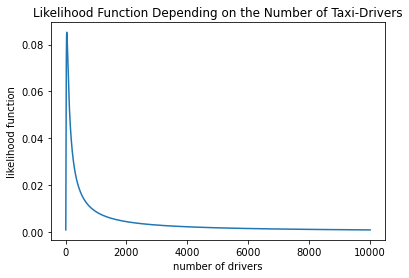

In [1032]:
plt.plot(ns, L_10(ns))
plt.xlabel('number of drivers')
plt.ylabel('likelihood function')
plt.title('Likelihood Function Depending on the Number of Taxi-Drivers');

Найдем ML-оценку

$$
\ln L = \ln 9 + \ln(n-1) + \ln(n-2)+\ldots +\ln(n-8) -9\ln n \longrightarrow\underset{n}\max\\
\frac{\partial\ln L}{\partial n} = \frac{1}{\hat n - 1}+\ldots+\frac{1}{\hat n - 8}-\frac{9}{\hat n}= 0\\
$$


Получится многочлен 8-й степени. Ручками такое не решится. Визуально, заметно, что функция имеет один максимум; $\lim_{n\rightarrow\inf} L(n) = 0$, Попробуем перебрать все целые $n$ от 9 до 10000.

In [1033]:
max_L = -1
arg_max_L = -1
for n in range(9, 10001):
    L = L_10(n)
    if L > max_L:
        max_L = L
        arg_max_L = n
print(arg_max_L)

42


$\hat n_{ml}=42$

__(б)__

In [1034]:
def expectation_taxi(n):
    expect = 0
    for i in range(2, n + 2):
        prod = 1
        for j in range(i - 1):
            prod *= (n - j)/n
        expect += i * (i-1) * prod / n
    return expect

Математическое ожидание в зависимости от $n$:

$$
\mathbb{E}X = \sum_{a = 2}^{n + 1}a * \mathbb{P}(X = a) = \sum_{a = 2}^{n + 1} a *\frac{a-1}{n}\cdot\prod_{i=0}^{a-2}\frac{n-i}{n}
$$


In [1035]:
ns = np.arange(100)

In [1036]:
expectations = np.array([])
for n in ns:
    expectations = np.append(expectations, expectation_taxi(n))

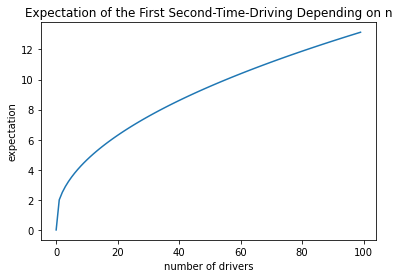

In [1037]:
plt.plot(ns, expectations);
plt.xlabel('number of drivers')
plt.ylabel('expectation')
plt.title('Expectation of the First Second-Time-Driving Depending on n');

Выборочный момент: $\bar X = X_1 = 10$ (у нас одно наблюдение)

Судя по картинке, матожидание монотонно возрастает в зависимости от $n$ (что логично), поэтому переберем циклом разные n.

In [1040]:
mse = np.array([])
for i in range(0,100):
    mse = np.append(mse, (expectations[i] - 10) ** 2)

Тогда ближайший n, к целочисленной оценке методом моментов:

In [1041]:
ns[mse.argmin()]

55

$\hat n_{mm} = 55$

__(в)__

напишем функцию правдоподобия в общем случае

$$
L = \mathbb{P}(X = a) = \frac{a - 1}{n}\cdot\prod_{i = 0}^{a -2}\frac{n - i}{n}
$$

In [1042]:
def Likelihood(a: int, n: int):
    L = (a - 1)/n
    prod = 1
    for i in range(a - 1):
        prod *= (n - i) / n
    L *= prod
    return L

Всего 100 таксистов, значит на 101 заказе точно будет хотя бы одно повторение.

In [1043]:
drivers = np.arange(1,101)

минимум функции правдоподобия я ищу перебирая все значения для $\hat n_ml$ от номера заказа, на котором впервые приехал уже возивший таксист - 1  $(taxi_n - 1)$, до $taxi_n \cdot 100$. В худшей ситуации (когда только на 101 заказе приедет старый таксист), график функции правдоподобия в зависимости от $n$ будет таким:

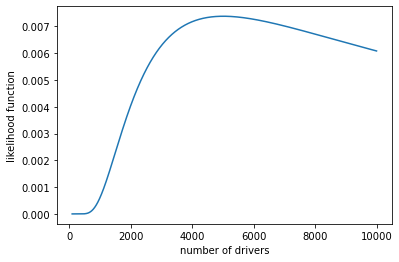

In [1218]:
plt.plot(np.arange(100, 10000),Likelihood(101, np.arange(100, 10000)));
plt.xlabel('number of drivers')
plt.ylabel('likelihood function');

т.е ml оценка найдется!

Для нахождения mm-оценки, я считаю среднеквадратичные ошибки матожидания от среднего для $n$ от $taxi_n -1$ до $taxi_n \cdot 100$. я останавливаю цикл, как только ошибка начинает возрастать.

Эта функция считает оптимальные mm и ml оценки 

In [818]:
np.random.seed(986)
ml_estimates = []
mm_estimates = []
for g in tqdm(range(10000)):
    observation = np.array([])
    for i in range(101):
        taxi = np.random.choice(drivers)
        if taxi in observation:
            break
        else:
            observation = np.append(observation, taxi)
    taxi_n = observation.shape[0] + 1
    ns_ml =  np.arange(taxi_n - 1, taxi_n * 100)
    Ls = Likelihood(a = taxi_n, n = ns_ml)
    n_ml = ns_ml[Ls.argmax()]
    ns_mm = np.arange(taxi_n - 1, taxi_n * 100)
    mse = np.array([])
    for i, j in enumerate(ns_mm):
        mse = np.append(mse, np.power(expectation_taxi(j) - taxi_n, 2))
        if i == 0:
            continue
        if mse[i] > mse[i - 1]:
            break
    n_mm = ns_mm[mse.argmin()]
    ml_estimates.append(n_ml)
    mm_estimates.append(n_mm)

100%|██████████| 10000/10000 [1:41:40<00:00,  1.64it/s] 


In [839]:
ml_estimates= np.array(ml_estimates)
mm_estimates = np.array(mm_estimates)

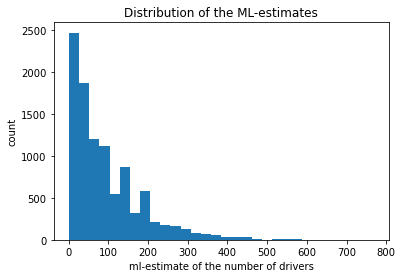

In [836]:
plt.hist(ml_estimates, bins = 30);
plt.xlabel('ml-estimate of the number of drivers')
plt.ylabel('count')
plt.title('Distribution of the ML-estimates');

Оценка смещения ml-оценки:

In [841]:
ml_estimates.mean() - 100

-4.340000000000003

Оценка дисперсии ml-оценки:

In [842]:
ml_estimates.var(ddof = 1)

8283.447744774478

Среднеквадратичная ошибка ml-оценки

In [913]:
np.sum((ml_estimates - 100) ** 2)/10000

8301.455

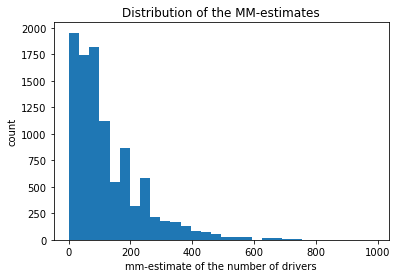

In [838]:
plt.hist(mm_estimates, bins = 30);
plt.xlabel('mm-estimate of the number of drivers')
plt.ylabel('count')
plt.title('Distribution of the MM-estimates');

Оценка смещения mm-оценки:

In [844]:
mm_estimates.mean() - 100

24.783900000000003

Оценка дисперсии mm-оценки:

In [845]:
mm_estimates.var(ddof = 1)

13726.45604639464

Среднеквадратичная ошибка mm-оценки:

In [1175]:
np.sum((mm_estimates - 100) ** 2)/10000

14339.3251

__Задача 2__

__(a)__ Пусть $X$ - случайная величина, которая равняется количеству уникальных имен таксистов. Сначала рассмотрим более простой случай. Допустим, делается 6 заказов, за которые мы встречаем 3 уникальных имен таксистов (всего таксистов n). Тогда

$$
\mathbb{P}_6(X = 3) = \frac{1}{n}\cdot\frac{1}{n}\cdot\frac{1}{n}\cdot\frac{n-1}{n}\cdot\frac{n-2}{n} + \frac{1}{n}\cdot\frac{1}{n}\cdot\frac{n-1}{n}\cdot\frac{2}{n}\cdot\frac{n-2}{n} +\\+ \frac{1}{n}\cdot\frac{1}{n}\frac{n-1}{n}\cdot\frac{n-2}{n}\cdot\frac{3}{n}+\frac{1}{n}\cdot\frac{n-1}{n}\cdot\frac{2}{n}\cdot\frac{2}{n}\cdot\frac{n-2}{n} +\\+\frac{1}{n}\cdot\frac{n-1}{n}\cdot\frac{2}{n}\cdot\frac{n-2}{n}\cdot\frac{3}{n}+\frac{1}{n}\cdot\frac{n-1}{n}\cdot\frac{n-2}{n}\cdot\frac{3}{n}\cdot\frac{3}{n} +\\+\frac{n-1}{n}\cdot\frac{2}{n}\cdot\frac{2}{n}\cdot\frac{2}{n}\cdot\frac{n-2}{n}+\frac{n-1}{n}\cdot\frac{2}{n}\cdot\frac{2}{n}\cdot\frac{n-2}{n}\cdot\frac{3}{n} +\\+\frac{n-1}{n}\cdot\frac{2}{n}\cdot\frac{n-2}{n}\cdot\frac{3}{n}\cdot\frac{3}{n}+\frac{n-1}{n}\cdot\frac{n-2}{n}\cdot\frac{3}{n}\cdot\frac{3}{n}\cdot\frac{3}{n}
$$

Что происходит выше?

Для любого количества заказов больше одного, вероятность встретить больше либо одного имени равна единице. Каждое новое имя добавляет в вероятность $\frac{n-i}{n}$, где $i$ - номер нового имени (первое имя считаем за 0). Но так как за $a$ заказов может быть $k<a$ имен, необходимо учесть тот факт, что одни и те же таксисты могут приехжеть несколько раз. Возьмем базовую формулу для $k$ имен:

$$
\frac{n-1}{n}\cdot\frac{n-2}{n}\cdot\ldots\cdot\frac{n - k + 1}{n}
$$

Если имен $k<a$ заказов, необходимо просуммировать такие "базовые" формулы, добавляя между ними множители $\frac{i}{n}$, где i определяется позицией множителя (интерпретация этого множителя состоит в количестве повторений $i$ имен к моменту данного заказа). Т.е, если $\frac{i}{n}$ стоит перед множителем $\frac{n-1}{n}$, (тогда $i=1$), то это означает, что самый первый водитель приехал два раза, а затем уже приехал второй и т.д. Если же множитель $\frac{i}{n}$ (тогда $i=2$) стоит перед $\frac{n-2}{n}$, то это означает, что на третий заказ приехал либо первый, либо второй таксист. Всего множителей вида $\frac{i}{n}$ будет $a - k$ штук. А количество слагаемых в формуле вероятности: $C_{k+ a-k-1}^{a-k}=C_{a-1}^{a-k}$, (сочетания с возвращениями). Почему сочетания? 

По-факту мы пытаемся разными способами разложить $a-k$ слагаемых вида $\frac{i}{n}$ по $k$ "корзинам". 

У $\mathbb{P}_{10}(X=6)$ можно вынести за скобки $\frac{(n-1)\cdot(n-2)\cdot\ldots\cdot(n-5)}{n^9}$, в скобках же останется сумма чисел, находящихся в числителях каждого из слагаемых (всего слагаемых будет $C_{9}^4=126$). можно разделить полученную вероятность на эту константу, тогда останется только функция от $n$, в силу монотонного характера преобразования максимум у нее не поменяется. Тогда монотонно-преобразованная функция правдоподобия:

$$
L = \frac{(n-1)\cdot(n-2)\cdot(n-3)\cdot(n-4)\cdot(n-5)}{n^9}\\
\ln L = \ln(n-1)+\ln(n-2)+\ln(n-3)+\ln(n-4)+\ln(n-5) - 9\ln n
$$

Опять таки, очень сложно аналитически найти решение для такой задачи, поэтому будем перебирать все возможные целые $n$.

In [1219]:
def likelihood_6(n):
    L = 1 / (n ** 4)
    for i in range(6):
        L *= (n-i) / n
    return L

In [1220]:
ns = np.arange(6,100)

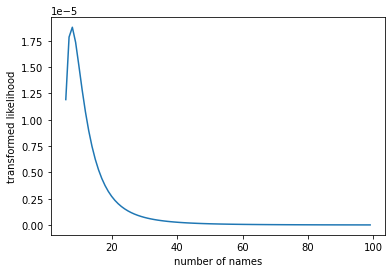

In [1221]:
plt.plot(ns, likelihood_6(ns));
plt.xlabel('number of names')
plt.ylabel('transformed likelihood');

Аналагично задаче 1, переберем ручками возможные n, чтобы найти такое, при котором функция правдоподобия принимает максимальное значение.

In [1222]:
max_L = -1
arg_max_L = -1
for n in range(6, 10000):
    if likelihood_6(n) > max_L:
        max_L = likelihood_6(n)
        arg_max_L = n

Получаем

In [1223]:
arg_max_L

8

Следовательно, $\hat n_{ml} = 8$

__(б)__ Я написал функцию, которая считает количества имен таксистов для 10 поездок для заданного $n$

In [1394]:
from itertools import combinations, combinations_with_replacement

In [1458]:
term_coefs = [] # этот кусок по-факту является частью функции, считающей матожидания, но вместе с ним она отрабатывала слишком 
for i in range(1, 11): #долго, поэтому я вытащил ее, и просто вставил полученные коэффициенты в следующую ячейку
    base = np.arange(1, i + 1)
    comb = set()
    coef_sum = 0 
    to_combinations = np.arange(1, 10 - i + 1)
    to_combinations = np.append(to_combinations, np.zeros(10 - to_combinations.shape[0]))
    for j in combinations_with_replacement(to_combinations, i):
        if sum(j) == 10 - i:
            comb.add(j)
    for a in comb:
        if type(a) == int:
            a = [a]
        permuted = np.array(list(set(permutations(a, i))))
        coefs = np.prod(base ** permuted, axis = 1)
        coef_sum += coefs.sum()
    term_coefs.append(coef_sum)
term_coefs

[1.0, 511.0, 9330.0, 34105.0, 42525.0, 22827.0, 5880.0, 750.0, 45.0, 1.0]

In [1647]:
def expectation_10(n):
    expect = 0
    expect = 0
    term_coefs = [1.0, 511.0, 9330.0, 34105.0, 42525.0, 22827.0, 5880.0, 750.0, 45.0, 1.0] #это посчиталось в пред. ячейке
    for i in range(1, 11):
        base_P = 1  / (n **(10 - i))
        for k in range(1, i + 1):
            base_P *= (n - k + 1)/n
        expect += i * term_coefs[i - 1] * base_P
    return expect

In [1648]:
expectation_10(20)

8.025261215232423

In [1649]:
expectation_10(16)

7.608632399220369

In [1650]:
expectations = []
for n in tqdm(range(1, 100)):
    x = expectation_10(n)
    expectations.append(x)

100%|██████████| 99/99 [00:00<?, ?it/s]


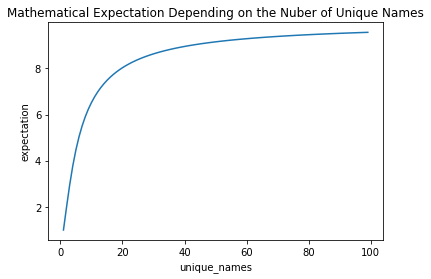

In [1456]:
plt.plot(list(range(1,100)), expectations)
plt.xlabel('unique_names')
plt.ylabel('expectation')
plt.title('Mathematical Expectation Depending on the Nuber of Unique Names');

Найдем оценку $\hat n$ методом моментов.

У нас есть одно наблюдение, следовательно выборочное среднее: $\bar X = X_1 = 6$. Метод моментов:

$$
\mathbb{E}[X] |_{n=\hat n}= \bar X 
$$

Переберем различные целочисленные $\hat n$, и возьмем такое, при котором отклонение среднего от матожидания минимально. Матожидание монотонно возрастает.

In [1463]:
mse_all = []
for n in range(1, 30):
    mse = (6 - expectation_10(n)) ** 2
    mse_all.append(mse)

In [1466]:
np.argmin(np.array(mse_all)) + 1 #поправляем на индексацию с нуля

8

Получается оценка методом моментов:

$$
\hat n_{mm} = 8
$$

__(в)__

In [1487]:
names = np.arange(1, 21)
names.shape

(20,)

In [1488]:
np.random.seed(767)
samples = np.random.choice(names, size = (10000, 10))

надо написать функцию правдоподобия для разных $n_{observed}$. Опять же, функция ниже является монотонным преобразованием действительной функции правдоподобия.

In [1507]:
def likelihood_names(names, n):
    base_P = 1  / (n **(10 - names))
    for k in range(1, names + 1):
        base_P *= (n - k + 1)/n
    return base_P

In [1534]:
ml_names = []

for sample in tqdm(samples):
    observed_n = np.unique(sample).shape[0]
    if observed_n == 10: # в этом случае оценка стремится к бесконечности
        ml_names.append(100) 
        continue
    max_L = -1
    arg_max_L = -1
    for n in range(observed_n, 1000):
        L = likelihood_names(observed_n, n)
        if L > max_L:
            max_L = L
            arg_max_L = n
    ml_names.append(arg_max_L)

100%|██████████| 10000/10000 [00:14<00:00, 709.83it/s]


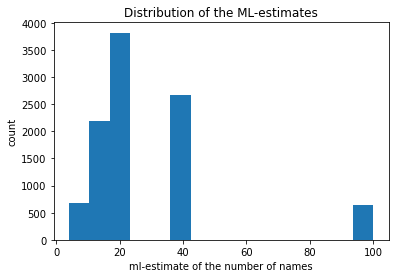

In [1654]:
plt.hist(ml_names, bins = 15);
plt.xlabel('ml-estimate of the number of names')
plt.ylabel('count')
plt.title('Distribution of the ML-estimates');

In [1548]:
ml_names = np.array(ml_names)

Оценка смещения ml-оценки

In [1549]:
ml_names.mean() - 20

8.0019

Оценка диспресии ml-оценки

In [1550]:
ml_names.var(ddof = 1)

499.7424706370637

Оценка среднеквадратичного отклонения ml-оценки

In [1552]:
np.sum((ml_names - 20) ** 2) / 10000

563.7229

Теперь для моментов

In [1641]:
samples.shape

(10000, 10)

In [1651]:
mm_names = []

for sample in tqdm(samples):
    observed_n = np.unique(sample).shape[0]
    if observed_n == 10: # в этом случае оценка стремится к бесконечности
        mm_names.append(100) 
        continue
    mse_list = []
    for i in range(1, 101):
        mse = (expectation_10(i) - observed_n) ** 2
        mse_list.append(mse)
        if i == 1:
            continue
        if mse_list[i -1] > mse_list[i - 2]:
            break
    mm_n = np.array(mse_list).argmin() + 1
    mm_names.append(mm_n)

100%|██████████| 10000/10000 [00:03<00:00, 3320.23it/s]


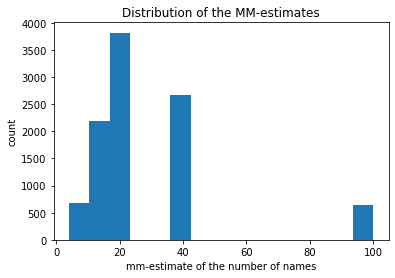

In [1655]:
plt.hist(mm_names, bins = 15)
plt.xlabel('mm-estimate of the number of names')
plt.ylabel('count')
plt.title('Distribution of the MM-estimates');

In [1656]:
mm_names = np.array(mm_names)

Оценка смещения для mm-оценки

In [1657]:
mm_names.mean() - 20

8.392399999999999

Оценка дисперсии mm-оценки

In [1658]:
mm_names.var(ddof = 1)

492.70009224922495

Оценка среднеквадратического отклонения mm-оценки

In [1659]:
np.sum((mm_names - 20) ** 2) / 10000

563.0832

__Задачи 4,5,6__

In [1670]:
def voweler(string):
    vowels = set('аеёиоуыэюя')
    if string[0].lower() in vowels:
        return 'vowel'
    else:
        return 'consonant'


__Задача 4__

In [1671]:
data = pd.read_excel('exam_grades.xlsx')

In [1672]:
data['first_letter'] = data['last_name'].apply(voweler)

In [1673]:
sample_v = data[data['first_letter'] == 'vowel']['grade'].values
n_v = sample_v.shape[0]
var_v = sample_v.var(ddof = 1)
mean_v = sample_v.mean()

sample_c = data[data['first_letter'] == 'consonant']['grade'].values
n_c = sample_c.shape[0]
var_c = sample_c.var(ddof = 1)
mean_c = sample_c.mean()

Тестируем следующее:

$H_0: \mu_c = \mu_v$

$H_1: \mu_c \not = \mu_v$

__(а)__ Welch's test. Предполагая, что выборки нормальные

$$
\frac{\hat\mu_c - \hat\mu_v -(\mu_c-\mu_v)}{\sqrt{\frac{\hat\sigma^2_c}{n_c}+\frac{\hat\sigma^2_v}{n_y}}}\overset{a.}\sim t_d
$$

Количетво степеней свободы можно оценить как

$$
\hat d =\frac{(\frac{\hat\sigma^2_c}{n_c}+\frac{\hat\sigma^2_v}{n_v})^2}{\frac{\hat\sigma^4_c}{(n_c-1)n_c^2}+\frac{\hat\sigma_v^4}{(n_v-1)n_v^2}}
$$

вычислим $\hat d$

In [1674]:
d = (var_c / n_c + var_v / n_v) / (var_c ** 2 / ((n_c - 1) * (n_c ** 2))+ var_v ** 2 / ((n_v - 1) * (n_v ** 2)))
d

40.04531907940249

$$
t_{obs} = \frac{\hat\mu_c - \hat\mu_v}{\sqrt{\frac{\hat\sigma^2_c}{n_c}+\frac{\hat\sigma^2_v}{n_y}}}
$$

In [1675]:
t_obs = (mean_c - mean_v) / np.sqrt(var_c / n_c + var_v / n_v)
t_obs

0.8519661870595602

In [1676]:
t_crit = stats.t.ppf(0.975, df = d)
t_crit

2.0210041370846357

$|t_{obs}| < t_{crit}$. Значит нет основанияя отвергать $H_0$

In [1677]:
stats.ttest_ind(sample_c, sample_v, equal_var= False) # ручками получилось правильно!

Ttest_indResult(statistic=0.8519661870595602, pvalue=0.3974027153843839)

In [1678]:
p_value = 2 * (1 - stats.t.cdf(t_obs, df = d))
p_value

0.3992993925647852

__(б)__ наивный бутстрэп

In [1679]:
np.random.seed(6546)
boot_stats_naive = list()
for i in range(10000):
    boot_sample_c = np.random.choice(sample_c, size = sample_c.shape[0])
    boot_sample_v = np.random.choice(sample_v, size = sample_v.shape[0])
    boot_stat = boot_sample_c.mean() - boot_sample_v.mean()
    boot_stats_naive.append(boot_stat)

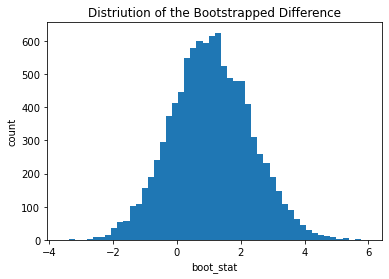

In [1680]:
plt.hist(boot_stats_naive, bins = 50);
plt.xlabel('boot_stat')
plt.ylabel('count')
plt.title('Distriution of the Bootstrapped Difference');

In [1681]:
q_left_naive = np.percentile(boot_stats_naive, 2.5)
q_right_naive = np.percentile(boot_stats_naive, 97.5)

In [1682]:
observed = mean_c - mean_v
observed

1.0782433114588574

Получаем наивный бутстрап- интервал

In [1683]:
ci = [q_left_naive, q_right_naive]
ci

[-1.3480421143722485, 3.585934232350184]

0 входит в интервал, следовательно, нет оснований отвергать $H_0$

p-значение я вычислил, посчитав доли бутстрап наблюдений больше и меньше 0, и взяв минимум из них двух, умножил на два (т.к. гипотеза двусторонняя)

In [1686]:
p_value_naive = 2 * min(np.sum((np.array(boot_stats_naive) > 0))/ 10000, np.sum((np.array(boot_stats_naive) <= 0))/10000)
p_value_naive

0.3918

__(в)__ бутстрап t-статистики

In [1060]:
t_observed = (mean_c - mean_v) / np.sqrt(var_c / n_c + var_v / n_v)
t_observed

0.8519661870595602

In [1088]:
np.random.seed(2534245)
boot_stats_t = []
for i in range(10000):
    boot_sample_c = np.random.choice(sample_c, size = sample_c.shape[0])
    boot_sample_v = np.random.choice(sample_v, size = sample_v.shape[0])
    boot_t = (boot_sample_c.mean() - boot_sample_v.mean() - (mean_c - mean_v))/(np.sqrt(boot_sample_c.var(ddof = 1)/ boot_sample_c.shape[0] + boot_sample_v.var(ddof = 1)/ boot_sample_v.shape[0]))
    boot_stats_t.append(boot_t)

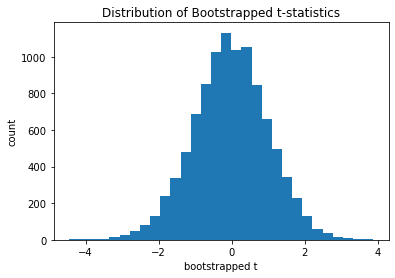

In [1687]:
plt.hist(boot_stats_t, bins = 30);
plt.title('Distribution of Bootstrapped t-statistics')
plt.xlabel('bootstrapped t')
plt.ylabel('count');

In [1090]:
q_left_t = np.percentile(boot_stats_t, 2.5)
q_right_t = np.percentile(boot_stats_t, 97.5)

По распределению бутстрапированных t-статистик получил квантили:

In [1091]:
q_left_t, q_right_t

(-2.1191775645848585, 1.9353991643062767)

Наблюдаемая t-статистика:

In [1092]:
t_observed

0.8519661870595602

t-observed находится внутри 'интервала', поэтому нет оснований отвергать $H_0$. p-значение:

In [1159]:
p_value = 2 * min(np.sum((boot_stats_t > t_observed))/ 10000, np.sum((boot_stats_t <= t_observed))/10000)
p_value

0.3804

__(г)__ Перестановочный тест

In [1137]:
from itertools import permutations

In [1131]:
pool = np.append(sample_c, sample_v)

Будем делать новые выборки размера $n_c$ и $n_v$ из объединенных сэмплов.

In [1140]:
permutation_means = []
for i in tqdm(range(10000)):
    permuted = np.random.permutation(pool)
    permuted_c = permuted[:n_c]
    permuted_v = permuted[n_c:]
    permuted_mean = permuted_c.mean() - permuted_v.mean()
    permutation_means.append(permuted_mean)

100%|██████████| 10000/10000 [00:00<00:00, 40597.32it/s]


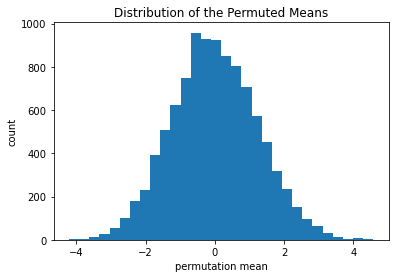

In [1144]:
plt.hist(permutation_means, bins = 30);
plt.xlabel('permutation mean')
plt.ylabel('count')
plt.title('Distribution of the Permuted Means');

Перестановочный интервал разниц матожиданий:

In [ ]:
permutation_means = np.array(permutation_means)

In [1694]:
np.percentile(permutation_means, 2.5), np.percentile(permutation_means, 97.5)

(-2.3693661210067045, 2.4429220451431455)

In [1700]:
observed

1.0782433114588574

In [1699]:
p_value = 2 * min(np.sum(permutation_means > observed)/ 10000, np.sum(permutation_means <= observed)/10000) 
p_value

0.3772

Уровень значимость 0.05 меньше p-значения, следовательно, нет оснований отвергать $H_0$

__Задача 5__

In [1584]:
def voweler(string):
    vowels = set('аеёиоуыэюя')
    if string[0].lower() in vowels:
        return 'vowel'
    else:
        return 'consonant'

def medianer(x):
    median = data['grade'].median()  
    if x > median:
        return 'more_than_median'
    else:
        return 'less_than_median'

In [1585]:
data = pd.read_excel('exam_grades.xlsx')

In [1586]:
data['first_letter'] = data['last_name'].apply(voweler)
data['median'] = data['grade'].apply(medianer)

In [1587]:
contingency_table = pd.crosstab(index = data['first_letter'], columns=data['median'])

In [1588]:
contingency_table

median,less_than_median,more_than_median
first_letter,,
consonant,138,145
vowel,28,21


In [1589]:
p_cons = contingency_table.iloc[0,1] / (contingency_table.iloc[0,0] + contingency_table.iloc[0,1])
p_vow = contingency_table.iloc[1,1] / (contingency_table.iloc[1,0] + contingency_table.iloc[1,1])
nc = (contingency_table.iloc[0,0] + contingency_table.iloc[0,1])
nv = (contingency_table.iloc[1,0] + contingency_table.iloc[1,1])

__(б)__  начну  с гипотезы

$H_0: p_c=p_v$

$H_1: p_c \not = p_v$

$$
Z_{obs} = \frac{\hat p_c-\hat p_v}{\sqrt{\frac{\hat p_c(1-\hat p_c)}{n_c}+\frac{\hat p_v(1-\hat p_v)}{n_v}}}\overset{a.}\sim N(0,1)
$$

In [1590]:
z_obs = (p_cons-p_vow)/np.sqrt(p_cons*(1-p_cons)/nc + p_vow * (1-p_vow)/nv)
z_obs

1.092714086706707

Критическое значение на уровне значимости 0.95:

In [1591]:
z_crit = stats.norm().ppf(0.975)
z_crit

1.959963984540054


$|Z_{obs}| < Z_{crit}$, следовательно нулевая гипотеза не отвергается

In [1592]:
p_value = 2*(1 - stats.norm().cdf(z_obs))
p_value

0.2745193528742256

__интервал__

отношение вероятностей приблизим в точке $(\hat p_v, \hat p_c) = (p_v, p_c)$

$$
h(\hat p_v, \hat p_c) = \frac{\hat p_v}{\hat p_c} \\
h(\hat p_v, \hat p_c) \approx\frac{p_v}{p_c} +\frac{1}{p_c}(\hat p_v - p_v) -\frac{p_v}{p_c^2}(\hat p_c - p_c)\\
Var(h(\hat p_v,\hat p_c))\approx Var(\frac{p_v}{p_c} +\frac{1}{p_c}(\hat p_v - p_v) -\frac{p_v}{p_c^2}(\hat p_c - p_c))= \\ \frac{1}{p_c^2}Var(\hat p_v) +\frac{p_v^2}{p_c^4}Var(\hat p_c) = \frac{p_v(1-p_v)}{p_c^2n_v}+\frac{p_v^2(1-p_c)}{p_c^3n_c}
$$

Тогда интервал будет иметь вид

$$
\frac{\hat p_v}{\hat p_c} - 1.96\cdot\sqrt{\frac{p_v(1-p_v)}{p_c^2n_v}+\frac{p_v^2(1-p_c)}{p_c^3n_c}} < \frac{p_v}{p_c} < \frac{\hat p_v}{\hat p_c} + 1.96\cdot\sqrt{\frac{p_v(1-p_v)}{p_c^2n_v}+\frac{p_v^2(1-p_c)}{p_c^3n_c}}
$$

Численно:

In [1618]:
p_ratio = p_vow/p_cons
p_var_ratio = p_vow * (1-p_vow)/(n_v *  p_cons **2) + (1-p_cons) * p_vow ** 2/(n_c * p_cons ** 3)

In [1619]:
p_ratio - z_crit * np.sqrt(p_var_ratio), p_ratio + z_crit * np.sqrt(p_var_ratio)

(0.5497946344819109, 1.1231117694589758)

Можно проверить гипотезу и через интервал

Гипотеза

$H_0: \frac{p_v}{p_c} = 1$

$H_1: \frac{p_v}{p_c}\not = 1$

Наблюдаемое значение статистики:

In [1621]:
z_obs = (p_ratio - 1)/np.sqrt(p_var_ratio)
z_obs

-1.118214734459665

In [1622]:
p_value = stats.norm.cdf(z_obs) * 2
p_value

0.26347529277764214

p-значение больше 0.05, следовательно, нет оснований отвергать гипотезу $H_0$ на уровне значимости 5%.

__(а)__ Что такое шансы?

Пусть $X_i$ ($Y_i$) - бернуллевская случайная величина, которая приимает значение 1, если студент с фамилией на согласную (гласную) получает оценку выше медианы, и 0 - если ниже. Тогда шансы хорошо написать экзамен:

$$
\hat ch_c = \frac{\sum X_i}{\sum(1- X_i)} = \frac{\sum X_i}{n_c - \sum X_i} = \frac{n_c}{n_c-\sum X_i}- 1 = \frac{1}{1-\hat p_c} -1\\
\hat ch_v = \frac{1}{1-\hat p_v} -1
$$

$$
\frac{\hat ch_v}{\hat ch_c} = \frac{\frac{1}{1-\hat p_v} -1}{\frac{1}{1-\hat p_c} -1} = \frac{\frac{\hat p_v}{1 - \hat p_v}}{\frac{\hat p_c}{1 - \hat p_c}} = \frac{\hat p_v(1-\hat p_c)}{\hat p_c (1-\hat p_v)}
$$

Оценки $\hat p_c$ и $\hat p_v$ состоятельны и асимптотически нормальны. Воспользуемся дельта методом, чтобы приблизительно оценить отношение шансов в окрестности точки $(\hat p_v,\hat p_c) = (p_v,p_c)$. В первом приближении:

$$
h(\hat p_v, \hat p_c) \approx h(p_v, p_c) + h'_{p_v}(p_v, p_c)(\hat p_v - p_v)+ h'_{p_c}(p_v, p_c)(\hat p_c - p_c)\\
h(\hat p_v, \hat p_c) \approx \frac{p_v(1-p_c)}{p_c(1-p_v)} + \frac{1-p_c}{(1-p_v)^2 p_c}(\hat p_v - p_v) + \frac{p_v}{p_c^2(1-p_v)}(\hat p_c - p_c)
$$

Тогда (выборки для фамилий, начинающихся на гласную и фамилий, начинающихся на солгасную независимы)

$$
Var(h(\hat p_v, p_c)) \approx Var(\frac{p_v(1-p_c)}{p_c(1-p_v)} + \frac{1-p_c}{(1-p_v)^2 p_c}(\hat p_v - p_v) + \frac{p_v}{p_c^2(1-p_v)}(\hat p_c - p_c)) =\\= \frac{(1-p_c)^2}{(1-p_v)^4p_c^2}Var(\hat p_v) + \frac{p_v^2}{p_c^4(1-p_v)^2}Var(\hat p_c)=\\= \frac{(1-p_c)^2}{(1-p_v)^4p_c^2}\cdot\frac{p_v(1-p_v)}{n_v} + \frac{p_v^2}{p_c^4(1-p_v)^2}\cdot\frac{p_c(1-p_c)}{n_c} =\\= \frac{(1-p_c)^2p_v}{(1-p_v)^3p_c^2n_v} +\frac{p_v^2(1-p_c)}{p_c^3(1-p_v)^2n_c} 
$$

Получается, что

$$
\frac{\hat ch_v}{\hat ch_c}\overset{a.}\sim N[\frac{p_v(1-p_c)}{p_c(1-p_v)}, \frac{(1-p_c)^2p_v}{(1-p_v)^3p_c^2n_v} +\frac{p_v^2(1-p_c)}{p_c^3(1-p_v)^2n_c} ]
$$

Тогда доверительный интервал:

$$
\frac{\hat p_v(1-\hat p_c)}{\hat p_c(1-\hat p_v)} - 1.96\cdot\sqrt{\frac{(1-\hat p_c)^2\hat p_v}{(1-\hat p_v)^3\hat p_c^2n_v} +\frac{\hat p_v^2(1-\hat p_c)}{\hat p_c^3(1-\hat p_v)^2n_c}} <\frac{ch_v}{ch_c}< \frac{\hat p_v(1-\hat p_c)}{\hat p_c(1-\hat p_v)} + 1.96\cdot\sqrt{\frac{(1-\hat p_c)^2\hat p_v}{(1-\hat p_v)^3\hat p_c^2n_v} +\frac{\hat p_v^2(1-\hat p_c)}{\hat p_c^3(1-\hat p_v)^2n_c}}
$$

Вычислим:

Наблюдаемое отношение шансов

In [1594]:
ch_ratio = p_vow * (1- p_cons) / (p_cons * (1 - p_vow))
ch_ratio

0.713793103448276

In [1600]:
var_ratio = p_vow * (1 - p_cons) ** 2 /(n_v * (p_cons ** 2) * (1 - p_vow) ** 3) + p_vow ** 2 * (1 - p_cons) / (n_c * ((1 - p_vow) ** 2) * p_cons**3)

Получаем интервал

In [1605]:
ch_ratio - z_crit * np.sqrt(var_ratio), ch_ratio + z_crit * np.sqrt(var_ratio)

(0.27700593497628884, 1.1505802719202631)

$H_0: \frac{ch_v}{ch_c} = 1$

$H_1: \frac{ch_v}{ch_c} \not= 1$


$$
Z_{obs} = \frac{\frac{\hat p_v(1-\hat p_c)}{\hat p_c(1-\hat p_v)} - 1}{\sqrt{\frac{(1-\hat p_c)^2\hat p_v}{(1-\hat p_v)^3\hat p_c^2n_v} +\frac{\hat p_v^2(1-\hat p_c)}{\hat p_c^3(1-\hat p_v)^2n_c}}}
$$

Наблюдаемая статистика

In [1607]:
z_obs = (ch_ratio - 1) / np.sqrt(var_ratio)
z_obs

-1.284275843841178

p-значение

In [1609]:
p_value = 2 * stats.norm.cdf(z_obs)
p_value

0.19904545585927402

p-значение больше 0.05, следовательно нет оснований отвергать нулевую гипотезу на уровне значимости 5%.

__(в)__ БУТСТРЭП

In [1114]:
obs_ratio = ch_v / ch_c

In [1115]:
ch_c, ch_v

(1.0507246376811592, 0.75)

In [1116]:
obs_ratio

0.713793103448276

In [1117]:
n_boot = 10000

наивный бутстрап: будем генерировать $\hat{(\frac{ch_v}{ch_c})}^*$

In [1118]:
np.random.seed(246)
boot_ratios = list()
for i in tqdm(range(n_boot)):
    boot_sample_idx = np.random.choice(data.index.values, size = 332)
    sample = data[['grade', 'first_letter']].iloc[boot_sample_idx]
    sample['md'] = sample['grade'].apply(lambda x: 'more_than_median' if x > sample.grade.median() else 'less_than_median')
    table = pd.crosstab(index = sample['first_letter'], columns=sample['md'])
    p_cons = table.iloc[0,1] / (table.iloc[0,0] + table.iloc[0,1])
    p_vow = table.iloc[1,1] / (table.iloc[1,0] + table.iloc[1,1])
    ch_c = 1 / (1-p_cons) - 1
    ch_v = 1 / (1-p_vow) - 1
    boot_ratio = ch_v / ch_c
    boot_ratios.append(boot_ratio)

100%|██████████| 10000/10000 [02:20<00:00, 71.28it/s]


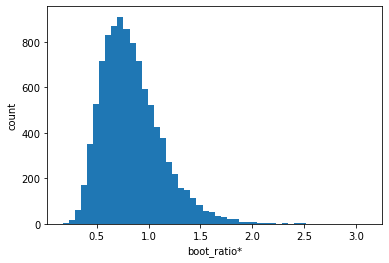

In [1121]:
plt.hist(boot_ratios, bins = 50);
plt.xlabel('boot_ratio*');
plt.ylabel('count');

In [1122]:
boot_ratios = np.array(boot_ratios)

In [1123]:
q_left = np.percentile(boot_ratios, 2.5)
q_right = np.percentile(boot_ratios, 97.5)

Получили квантили

In [1124]:
q_right

1.5401953418482344

In [1125]:
q_left

0.40539847539847534

Получаем

$$
q_{left}(R^*) <\frac{ch_v}{ch_c} < q_{right}(R^*)\\
$$

In [1126]:
obs_ratio

0.713793103448276

Вычислим:

In [1127]:
q_left, q_right

(0.40539847539847534, 1.5401953418482344)

Гипотеза:

$H_0: ch_c = ch_v$

$H_1: ch_c \not = ch_v$

Получаем $\frac{ch_c}{ch_v}=1$, входит в интервал, нет оснований отвергать $H_0$.

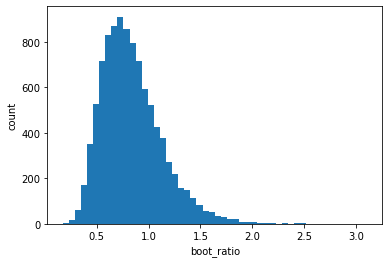

In [1128]:
plt.hist(boot_ratios ,bins = 50);
plt.xlabel('boot_ratio')
plt.ylabel('count');

Двустороннее p-value

In [1702]:
p_value = 2 * min(np.sum(boot_ratios < 1)/10000, np.sum(boot_ratios >= 1)/10000)
p_value

0.504

__Задача 6__

In [1628]:
data['len_name'] = data['last_name'].apply(lambda x: len(x))

$$
\mathbb{E} [Y_i] = \beta F_i
$$

По-факту здесь

$$
\mathbb{E}[Y_i|F_i] = \beta F_i
$$

Возьмем математическое ожидание от левой и правой частей

$$
\mathbb{E}[\mathbb{E}[Y_i|F_i]] = \beta\cdot\mathbb{E}[F_i]\\
\mathbb{E}[Y_i] = \beta\cdot\mathbb{E}[F_i]
$$

Оценивая $\mathbb{E}[Y_i]$ и $\mathbb{E}[F_i]$ методом моментов с помощью первого начального момента, получаем

$$
\mathbb{E}[Y_i] = \bar Y, \mathbb{E}[F_i] = \bar F
$$

Тогда
$$
\bar Y = \beta \bar F\\
\hat\beta = \frac{\bar Y}{\bar F}
$$

Подставляем данные и получаем оценку параметра бета:

In [1629]:
beta = data['grade'].mean() / data['len_name'].mean()
beta

2.0613026819923372

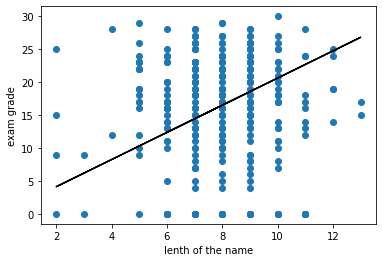

In [1630]:
plt.plot(data['len_name'], data['len_name'] * beta, color = 'black')
plt.scatter(data['len_name'], data['grade']);
plt.xlabel('lenth of the name')
plt.ylabel('exam grade');

In [1631]:
data[['grade', 'len_name']].corr()

,grade,len_name
grade,1.000000,0.025328
len_name,0.025328,1.000000


Получается выборочная кореляция:

In [1632]:
p = data[['grade', 'len_name']].corr().iloc[0,1]
p

0.025328052669147543

__(б)__

$H_0: p = 0$

$H_1: p \not = 0$

Будем переставлять $Y_i$

In [1633]:
np.random.seed(3456436)
p_permuted = []
for i in tqdm(range(10000)):
    y_permuted = np.random.permutation(data.grade)
    p_new = np.corrcoef(y_permuted, data.len_name)[0,1]
    p_permuted.append(p_new)

100%|██████████| 10000/10000 [00:01<00:00, 8065.92it/s]


In [1634]:
p_permuted = np.array(p_permuted)

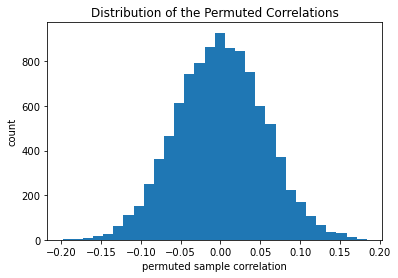

In [1635]:
plt.hist(p_permuted, bins = 30);
plt.xlabel('permuted sample correlation')
plt.ylabel('count')
plt.title('Distribution of the Permuted Correlations');

In [1705]:
p #наблюдаемая корреляция

0.025328052669147543

Рассчитаем p-значение

In [1703]:
p_value = 2 * min(np.sum(p_permuted > p)/10000, np.sum(p_permuted <= p)/10000)
p_value

0.6536

Получили p-значение, которое ни для одного разумного уровня значимости (0.01, 0.05, 0.1) не позволяет отвергнуть нулевую гипотезу.

95-% доверительный интервал:

In [1637]:
q_left = np.percentile(p_permuted, 2.5)
q_right = np.percentile(p_permuted, 97.5)
q_left, q_right

(-0.10660735029950491, 0.10804284937014741)

__Задание 8__

При подготовке к минимумам  я переодически пользовался учебником 'Probability and Statistics for Economists' Брюса Хансена. В частности, я смотрел там как выглядят функции плотности и распределения для разных распределений, как эти распаределения выглядят графически.

ссылка на учебник: https://disk.yandex.ru/i/GGz2X5BRMB3mQg

В целом, автор очень понятно и доступно излагает материал + все на английском языке, что помогает узнать, как выглядят 'профессиональные' вероятностные термины на языке мировой науки.

__Задание 7__

Я попробовал решить с помощью чата GPT довольно простую задачку из листочков по вероятностям. Задача была сформулирована следующим образом:

*Имеется три монетки. Две «правильных» и одна — с «орлами» по обеим сторонам. Петя выбирает одну монетку наугад и подкидывает её два раза. Оба раза выпадает «орел». Какова условная вероятность того, что монетка «неправильная»?*

(Это задача 3.1 из подборки probability_pro)

Я использовал следующий бот-чатGPT в телеграме: https://t.me/gpt3_unlim_chatbot

Вот экспорт переписки:

<a href="https://ibb.co/Cn9hzSX"><img src="https://i.ibb.co/hKdDyTn/messages.png" alt="messages" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'>скачать картинки на whatsapp</a><br />

Он сразу понял, как надо решать задачу, но допускал арифметическую ошибку. В итоге пришлось явно указать, как надо посчитать одну вероятность, чтобы он ее наконец исправил.